In [2]:
# import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# loading files for analysis

giving_2019 = pd.read_csv('NP.givingwoSP.2019.csv')
giving_2018 = pd.read_csv('NP.givingwoSP.2018.csv')
giving_2017 = pd.read_csv('NP.givingwoSP.2017.csv')
giving_2016 = pd.read_csv('NP.givingwoSP.2016.csv')
giving_2015 = pd.read_csv('NP.givingwoSP.2015.csv')

# renaming column headers

giving_2019.columns = ['ID', 'gvg_2019', 'gvg_wsc_2019', 'LinkedSC', 'SCAmt', 'LinkedName', 'LinkedAmt']
giving_2018.columns = ['ID', 'gvg_2018', 'gvg_wsc_2018', 'LinkedSC', 'SCAmt', 'LinkedName', 'LinkedAmt']
giving_2017.columns = ['ID', 'gvg_2017', 'gvg_wsc_2017', 'LinkedSC', 'SCAmt', 'LinkedName', 'LinkedAmt']
giving_2016.columns = ['ID', 'gvg_2016', 'gvg_wsc_2016', 'LinkedSC', 'SCAmt', 'LinkedName', 'LinkedAmt']
giving_2015.columns = ['ID', 'gvg_2015', 'gvg_wsc_2015', 'LinkedSC', 'SCAmt', 'LinkedName', 'LinkedAmt']


In [4]:
# condense dataframes to ID, name and giving columns

gvg_19_condense = giving_2019[['ID', 'gvg_2019']]
gvg_18_condense = giving_2018[['ID', 'gvg_2018']]
gvg_17_condense = giving_2017[['ID', 'gvg_2017']]
gvg_16_condense = giving_2016[['ID', 'gvg_2016']]
gvg_15_condense = giving_2015[['ID', 'gvg_2015']]

In [5]:
# merge df's through inner merge

combined_gvg = gvg_19_condense.merge(gvg_18_condense).merge(gvg_17_condense).merge(gvg_16_condense).merge(gvg_15_condense)
print(combined_gvg.head())

     ID  gvg_2019  gvg_2018  gvg_2017  gvg_2016  gvg_2015
0  5998   11000.0   10000.0   12000.0   10000.0   10000.0
1  1282   10000.0   11000.0   10000.0   10000.0    1000.0
2  6777    6340.1    3750.0     400.0     750.0    1650.0
3   402    3200.0    2500.0    2500.0    2750.0    2250.0
4  2379    2000.0    2000.0    1000.0    2000.0    2000.0


In [6]:
print(combined_gvg.tail())

       ID  gvg_2019  gvg_2018  gvg_2017  gvg_2016  gvg_2015
105  2805     300.0     300.0     100.0     100.0     125.0
106  2095     500.0    1000.0    1500.0    1000.0    1000.0
107  6808     250.0     250.0     250.0     250.0     250.0
108  2622     500.0    1000.0     500.0     500.0     500.0
109   683    2000.0    1500.0    1500.0    1125.0     200.0


In [7]:
# merge dataframes to retain all rows through an outer merge

gvg_19_18_outer = pd.merge(gvg_19_condense, gvg_18_condense, how = 'outer').reset_index(drop = True)

gvg_17_outer = pd.merge(gvg_19_18_outer, gvg_17_condense, how = 'outer').reset_index(drop = True)

gvg_16_outer = pd.merge(gvg_17_outer, gvg_16_condense, how = 'outer').reset_index(drop = True)

combined_gvg_df = pd.merge(gvg_16_outer, gvg_15_condense, how = 'outer').reset_index(drop = True)

# replace all NaN cells with 0

combined_gvg_df.fillna(0, inplace = True)

# save df to csv file

combined_gvg_df.to_csv('NP.combined_gvg_woSP.csv')

print(combined_gvg_df.tail())

# print(combined_gvg_df.info())


        ID  gvg_2019  gvg_2018  gvg_2017  gvg_2016  gvg_2015
1048  7063       0.0       0.0       0.0       0.0      25.0
1049  7068       0.0       0.0       0.0       0.0      25.0
1050   792       0.0       0.0       0.0       0.0      20.0
1051  6960       0.0       0.0       0.0       0.0      20.0
1052  2310       0.0       0.0       0.0       0.0     250.0


In [8]:
# calculate aggregate giving stats by year

total_19 = round(np.sum(combined_gvg_df['gvg_2019']), 2)

total_18 = round(np.sum(combined_gvg_df['gvg_2018']), 2)

total_17 = round(np.sum(combined_gvg_df['gvg_2017']), 2)

total_16 = round(np.sum(combined_gvg_df['gvg_2016']), 2)

total_15 = round(np.sum(combined_gvg_df['gvg_2015']), 2)

print('Total giving per calendar year')
print('2019: $' + str(total_19))
print('2018: $' + str(total_18))
print('2017: $' + str(total_17))
print('2016: $' + str(total_16))
print('2015: $' + str(total_15))

Total giving per calendar year
2019: $189294.73
2018: $228603.94
2017: $181572.84
2016: $206530.3
2015: $152126.33


In [9]:
# calculate mean values by year

nonzero_2019 = [amt for amt in combined_gvg_df['gvg_2019'] if amt > 0]
nonzero_2018 = [amt for amt in combined_gvg_df['gvg_2018'] if amt > 0]
nonzero_2017 = [amt for amt in combined_gvg_df['gvg_2017'] if amt > 0]
nonzero_2016 = [amt for amt in combined_gvg_df['gvg_2016'] if amt > 0]
nonzero_2015 = [amt for amt in combined_gvg_df['gvg_2015'] if amt > 0]

mean_2019 = round(np.mean(nonzero_2019), 2)
mean_2018 = round(np.mean(nonzero_2018), 2)
mean_2017 = round(np.mean(nonzero_2017), 2)
mean_2016 = round(np.mean(nonzero_2016), 2)
mean_2015 = round(np.mean(nonzero_2015), 2)

print('Average contributions per donor by calendar year')
print('$' +str(mean_2019))
print('$' +str(mean_2018))
print('$' +str(mean_2017))
print('$' +str(mean_2016))
print('$' +str(mean_2015))

Average contributions per donor by calendar year
$444.35
$450.9
$377.49
$463.07
$344.96


In [10]:
# calculate median values each year

median_2019 = round(np.median(nonzero_2019), 2)
median_2018 = round(np.median(nonzero_2018), 2)
median_2017 = round(np.median(nonzero_2017), 2)
median_2016 = round(np.median(nonzero_2016), 2)
median_2015 = round(np.median(nonzero_2015), 2)

print('Median contributions by calendar year')
print('$' +str(median_2019))
print('$' +str(median_2018))
print('$' +str(median_2017))
print('$' +str(median_2016))
print('$' +str(median_2015))

Median contributions by calendar year
$120.0
$200.0
$100.0
$150.0
$115.0


In [11]:
# calculate number of donors each calendar year

count_19 = np.count_nonzero(combined_gvg_df['gvg_2019'])
count_18 = np.count_nonzero(combined_gvg_df['gvg_2018'])
count_17 = np.count_nonzero(combined_gvg_df['gvg_2017'])
count_16 = np.count_nonzero(combined_gvg_df['gvg_2016'])
count_15 = np.count_nonzero(combined_gvg_df['gvg_2015'])

print('Number of donors by calendar year')
print(count_19)
print(count_18)
print(count_17)
print(count_16)
print(count_15)

Number of donors by calendar year
426
507
481
446
441


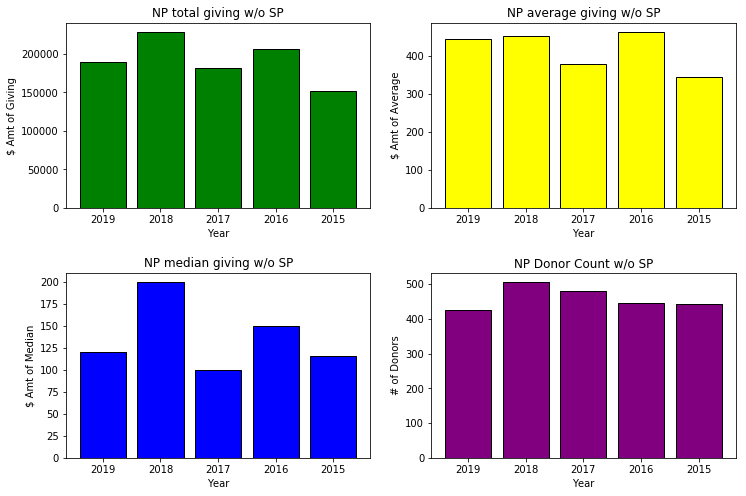

In [12]:
# plot total giving results

years = ['2019', '2018', '2017', '2016', '2015']

total_gvg = np.array([total_19, total_18, total_17, total_16, total_15])
mean_array = np.array([mean_2019, mean_2018, mean_2017, mean_2016, mean_2015])
median_array = np.array([median_2019, median_2018, median_2017, median_2016, median_2015])
count_array = np.array([count_19, count_18, count_17, count_16, count_15])

plt.figure(figsize = (12, 8))
plt.subplot(2, 2, 1)
plt.bar(years, total_gvg, facecolor = 'green', edgecolor = 'black' )
plt.title('NP total giving w/o SP')
plt.xlabel('Year')
plt.ylabel('$ Amt of Giving')

plt.subplot(2, 2, 2)
plt.bar(years, mean_array, facecolor = 'yellow', edgecolor = 'black' )
plt.title('NP average giving w/o SP')
plt.xlabel('Year')
plt.ylabel('$ Amt of Average')

plt.subplot(2, 2, 3)
plt.bar(years, median_array, facecolor = 'blue', edgecolor = 'black' )
plt.title('NP median giving w/o SP')
plt.xlabel('Year')
plt.ylabel('$ Amt of Median')

plt.subplot(2, 2, 4)
plt.bar(years, count_array, facecolor = 'purple', edgecolor = 'black' )
plt.title('NP Donor Count w/o SP')
plt.xlabel('Year')
plt.ylabel('# of Donors')

plt.subplots_adjust(hspace = 0.35)
plt.savefig('NP_woSP_plots.png')
plt.show()

In [13]:
print(total_gvg)
print(mean_array)
print(median_array)
print(count_array)

[189294.73 228603.94 181572.84 206530.3  152126.33]
[444.35 450.9  377.49 463.07 344.96]
[120. 200. 100. 150. 115.]
[426 507 481 446 441]
